In [15]:
#Question 2:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

data = digits.data
target = digits.target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [18]:
# Question 3:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score


def build_model(num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(64,)))
    for _ in range(num_layers):
        # 68 neurons, the 64 above is input image shape
        model.add(Dense(68, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = {}
for layers in range(1, 4):
    print(f"Training model with {layers} layers...")
    model = build_model(layers)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    results[f"{layers} layers"] = accuracy


Training model with 1 layers...
Epoch 1/50
36/36 [==============================] - 1s 8ms/step - loss: 2.2810 - accuracy: 0.2437 - val_loss: 2.2608 - val_accuracy: 0.2361
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 2.2404 - accuracy: 0.3299 - val_loss: 2.2163 - val_accuracy: 0.3021
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 2.1874 - accuracy: 0.4334 - val_loss: 2.1595 - val_accuracy: 0.3542
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 2.1216 - accuracy: 0.5039 - val_loss: 2.0870 - val_accuracy: 0.5139
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 2.0412 - accuracy: 0.5492 - val_loss: 2.0017 - val_accuracy: 0.5486
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 1.9459 - accuracy: 0.6536 - val_loss: 1.9008 - val_accuracy: 0.6562
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 1.8410 - accuracy: 0.6823 - val_loss: 1.7930 - val_accur

In [19]:
# Question 4:
# Note will take about 5 minutes for execution since there will 0.5-0.0 dropout rates evaluated
# for 1-3 layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Create a function to build the model with a dropout rate parameter
def build_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(64,)))
    for _ in range(num_layers):
        model.add(Dense(68, activation='relu'))
        # Apply dropout with the specified rate
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = {}
for layers in range(1, 4):
    # Dropout rates from 0.0 to 0.5 with step size 0.1
    for dropout_rate in [i * 0.1 for i in range(6)]:
        print(f"Training model with {layers} layers and dropout rate {dropout_rate}...")
        model = build_model(layers, dropout_rate)

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=1)

        y_pred = model.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=1)

        accuracy = accuracy_score(y_test, y_pred_classes)
        results[f"{layers} layers, dropout {dropout_rate}"] = accuracy

for config, accuracy in results.items():
    print(f"Accuracy with {config}: {accuracy:.4f}")


Training model with 1 layers and dropout rate 0.0...
Epoch 1/50
36/36 [==============================] - 1s 13ms/step - loss: 2.2866 - accuracy: 0.2167 - val_loss: 2.2692 - val_accuracy: 0.4479
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 2.2482 - accuracy: 0.5248 - val_loss: 2.2259 - val_accuracy: 0.5625
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 2.1940 - accuracy: 0.5857 - val_loss: 2.1637 - val_accuracy: 0.6146
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 2.1226 - accuracy: 0.7137 - val_loss: 2.0861 - val_accuracy: 0.6528
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 2.0367 - accuracy: 0.6527 - val_loss: 1.9935 - val_accuracy: 0.6944
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 1.9346 - accuracy: 0.7476 - val_loss: 1.8869 - val_accuracy: 0.6875
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 1.8217 - accuracy: 0.7154 - val_lo

Epoch 1/50
36/36 [==============================] - 2s 9ms/step - loss: 2.2871 - accuracy: 0.1680 - val_loss: 2.2510 - val_accuracy: 0.2812
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 2.2033 - accuracy: 0.2959 - val_loss: 2.0771 - val_accuracy: 0.5035
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 1.9412 - accuracy: 0.4413 - val_loss: 1.6542 - val_accuracy: 0.5174
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 1.5277 - accuracy: 0.5509 - val_loss: 1.2004 - val_accuracy: 0.7535
Epoch 5/50
36/36 [==============================] - 0s 8ms/step - loss: 1.1768 - accuracy: 0.6693 - val_loss: 0.9355 - val_accuracy: 0.7882
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 0.9571 - accuracy: 0.7145 - val_loss: 0.7548 - val_accuracy: 0.8021
Epoch 7/50
36/36 [==============================] - 0s 8ms/step - loss: 0.8306 - accuracy: 0.7511 - val_loss: 0.6494 - val_accuracy: 0.8264
Epoch 8/50
36/36 [==

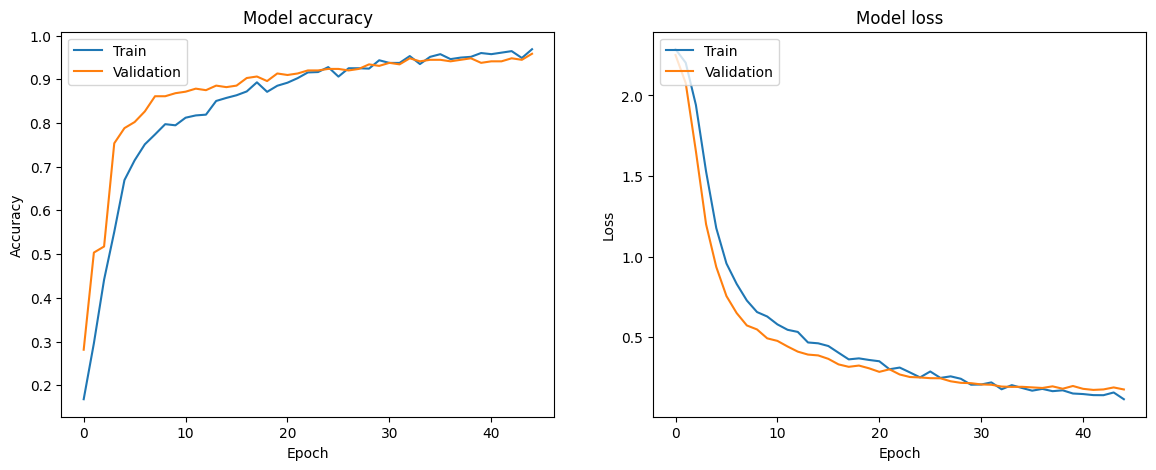

In [20]:
# Question 6:
# The most optimal model from above turns out to be 3 layer with dropout of 0.2
import matplotlib.pyplot as plt

optimal_layers = 3
optimal_dropout_rate = 0.2

model = build_model(optimal_layers, optimal_dropout_rate)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=1)

print("Model Summary:")
model.summary()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Training model with batch size 32...
Epoch 1/10
36/36 [==============================] - 2s 13ms/step - loss: 2.2896 - accuracy: 0.1715 - val_loss: 2.2584 - val_accuracy: 0.5208
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 2.2027 - accuracy: 0.3908 - val_loss: 2.0812 - val_accuracy: 0.5451
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 1.9324 - accuracy: 0.4917 - val_loss: 1.6291 - val_accuracy: 0.5799
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 1.4936 - accuracy: 0.5379 - val_loss: 1.1523 - val_accuracy: 0.6701
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 1.1805 - accuracy: 0.6258 - val_loss: 0.9427 - val_accuracy: 0.7049
Epoch 6/10
36/36 [==============================] - 0s 7ms/step - loss: 1.0088 - accuracy: 0.6789 - val_loss: 0.8071 - val_accuracy: 0.7882
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 0.8853 - accuracy: 0.7102 - val_loss: 0.6965 - val

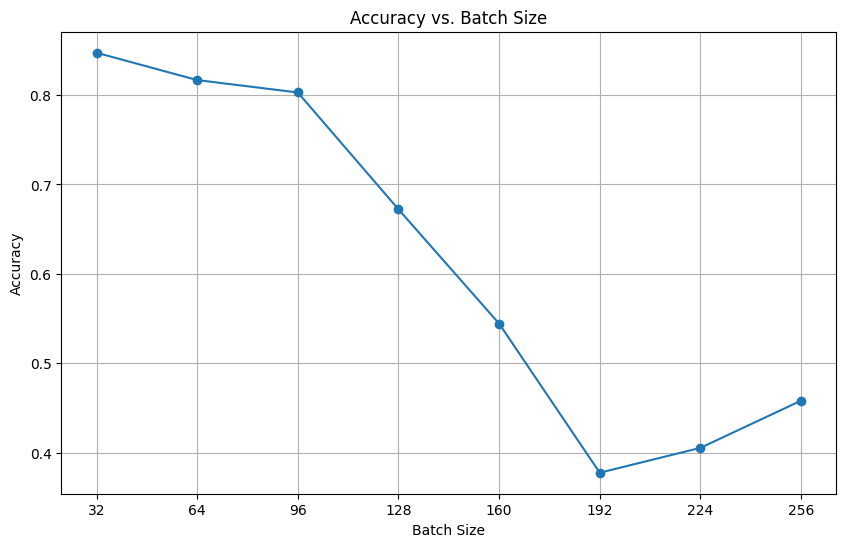

In [22]:
# Question 7:
import numpy as np

def build_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(64,)))
    for _ in range(num_layers):
        model.add(Dense(68, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimal_layers = 3
optimal_dropout_rate = 0.2

batch_results = {}
for batch_size in range(32, 257, 32):
    print(f"Training model with batch size {batch_size}...")
    model = build_model(optimal_layers, optimal_dropout_rate)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    batch_results[f"Batch size {batch_size}"] = accuracy

for config, accuracy in batch_results.items():
    print(f"Accuracy with {config}: {accuracy:.4f}")

batch_sizes = np.arange(32, 257, 32)
accuracies = [batch_results[f"Batch size {size}"] for size in batch_sizes]

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.xticks(batch_sizes)
plt.grid(True)
plt.show()

Training model with batch size 32...
Epoch 1/10
36/36 [==============================] - 2s 9ms/step - loss: 2.2912 - accuracy: 0.1540 - val_loss: 2.2679 - val_accuracy: 0.1944
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 2.2250 - accuracy: 0.2898 - val_loss: 2.1220 - val_accuracy: 0.3056
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 1.9763 - accuracy: 0.4221 - val_loss: 1.7143 - val_accuracy: 0.5590
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 1.5760 - accuracy: 0.5352 - val_loss: 1.2843 - val_accuracy: 0.6424
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 1.2269 - accuracy: 0.6066 - val_loss: 0.9941 - val_accuracy: 0.7222
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 1.0334 - accuracy: 0.6554 - val_loss: 0.8458 - val_accuracy: 0.7569
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.6936 - val_loss: 0.7707 - val_

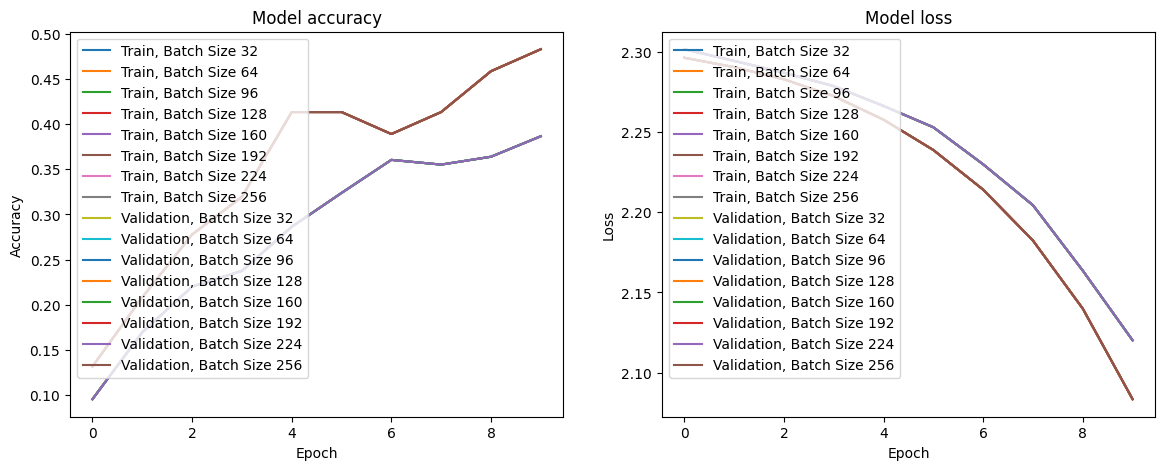

In [33]:
# Question 8:
import matplotlib.pyplot as plt

def build_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(64,)))
    for _ in range(num_layers):
        model.add(Dense(68, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimal_layers = 3
optimal_dropout_rate = 0.2

batch_results = {}
for batch_size in range(32, 257, 32):
    print(f"Training model with batch size {batch_size}...")
    model = build_model(optimal_layers, optimal_dropout_rate)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    batch_results[f"Batch size {batch_size}"] = accuracy

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for batch_size in range(32, 257, 32):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'Train, Batch Size {size}' for size in range(32, 257, 32)] + [f'Validation, Batch Size {size}' for size in range(32, 257, 32)], loc='upper left')

plt.subplot(1, 2, 2)
for batch_size in range(32, 257, 32):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend([f'Train, Batch Size {size}' for size in range(32, 257, 32)] + [f'Validation, Batch Size {size}' for size in range(32, 257, 32)], loc='upper left')

plt.show()

In [34]:
# Question 9:
# since the best model was of 3 layers with 0.2 dropout rate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(64,)))
    for _ in range(3):
        model.add(Dense(68, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

Epoch 1/50
36/36 [==============================] - 3s 15ms/step - loss: 2.2905 - accuracy: 0.1488 - val_loss: 2.2665 - val_accuracy: 0.3576
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 2.2258 - accuracy: 0.3560 - val_loss: 2.1354 - val_accuracy: 0.5833
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 1.9950 - accuracy: 0.4587 - val_loss: 1.7207 - val_accuracy: 0.6181
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 1.5753 - accuracy: 0.5265 - val_loss: 1.2625 - val_accuracy: 0.6979
Epoch 5/50
36/36 [==============================] - 0s 11ms/step - loss: 1.2656 - accuracy: 0.5753 - val_loss: 1.0278 - val_accuracy: 0.7361
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 1.1022 - accuracy: 0.6423 - val_loss: 0.8986 - val_accuracy: 0.7500
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.9564 - accuracy: 0.6597 - val_loss: 0.7790 - val_accuracy: 0.7917
Epoch 8/50
36/36 [

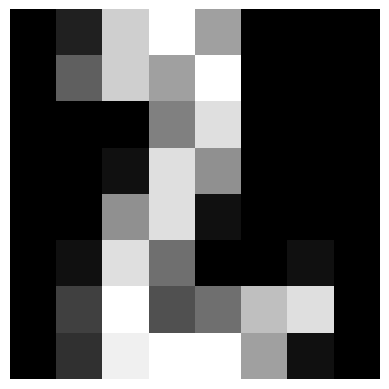

1/1 [==============================] - 0s 78ms/step
Predicted Label: 2


In [35]:
# Question 10:
import matplotlib.pyplot as plt
plt.imshow(X_test[4].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

predicted_label = np.argmax(model.predict(X_test[4].reshape(1, -1)))

print(f"Predicted Label: {predicted_label}")

The image shows the number 5 and it's label is 5 as well.. proving the model works fine. tho test accuracy seems dissapointing.

In [36]:
import numpy as np

predicted_labels = np.argmax(model.predict(X_test[:10]), axis=1)

print("Predicted Labels:", predicted_labels)
print("Actual Labels:   ", y_test[:10])

1/1 [==============================] - 0s 20ms/step
Predicted Labels: [6 9 3 7 2 1 5 2 5 2]
Actual Labels:    [6 9 3 7 2 1 5 2 5 2]
